In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ast
from geopy.distance import distance

In [31]:
path = r'Map__Crime_Incidents_-_from_1_Jan_2003.csv'

df = pd.read_csv(path)

In [32]:
df.columns

Index([u'IncidntNum', u'Category', u'Descript', u'DayOfWeek', u'Date', u'Time',
       u'PdDistrict', u'Resolution', u'Address', u'X', u'Y', u'Location'],
      dtype='object')

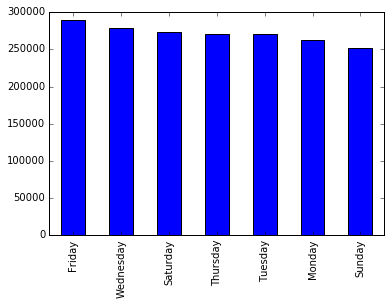

In [34]:
df['DayOfWeek'].value_counts().plot(kind='bar')

In [35]:
df['Location']

0          (37.7734305349811, -122.425722704575)
1           (37.7978728855933, -122.39670853026)
2          (37.7892525040522, -122.405254463024)
3          (37.7914943051906, -122.420874632415)
4          (37.7911776792224, -122.400748631911)
5          (37.7887198688133, -122.402070243227)
6          (37.7800304351156, -122.432116233695)
7          (37.7737003358973, -122.420908634584)
8          (37.7474613181905, -122.481305019184)
9          (37.7294075591753, -122.404407189561)
10         (37.7985525790132, -122.423985900144)
11         (37.7765342338882, -122.404325678542)
12          (37.775420706711, -122.403404791479)
13         (37.7164758973784, -122.453994369282)
14         (37.7738297399448, -122.498798508742)
15         (37.7753128522284, -122.395021745914)
16         (37.7753128522284, -122.395021745914)
17         (37.7298789539444, -122.372013936604)
18         (37.7433051722888, -122.468615356511)
19         (37.7346975540144, -122.491277558988)
20         (37.77229

In [37]:
us = (37.785087399999995, -122.3973113)

some_crime = (37.760801062884, -122.435563016294)

In [38]:
d = distance(us, some_crime)

In [39]:
d.feet

14158.49785478934

In [56]:
l = df['Location']

In [60]:
next(l.iteritems())

(0, '(37.7734305349811, -122.425722704575)')

In [65]:
ast.literal_eval('(37.7734305349811, -122.425722704575)')

(37.7734305349811, -122.425722704575)

In [93]:
def within_1000_feet_of_us(number_of_feet, current_coordinates):
    indices = []
    for index, string in df['Location'].iteritems():
        if index > 1000:
            return indices
        coordinates = ast.literal_eval(string)
        if distance(coordinates, current_coordinates).feet < number_of_feet:
            indices.append(df.iloc[index])

our_location = '(37.7734305349811, -122.425722704575)'
search_distance = 50
print within_1000_feet_of_us(search_distance, our_location)

[IncidntNum                                150027849
Category                               NON-CRIMINAL
Descript                     SEARCH WARRANT SERVICE
DayOfWeek                                    Friday
Date                         01/09/2015 12:00:00 AM
Time                                          22:02
PdDistrict                                 NORTHERN
Resolution                           ARREST, BOOKED
Address                      200 Block of LAGUNA ST
X                                          -122.426
Y                                           37.7734
Location      (37.7734305349811, -122.425722704575)
Name: 0, dtype: object]


In [81]:
df.iloc[140]

IncidntNum                                150008388
Category                             SUSPICIOUS OCC
Descript                    INVESTIGATIVE DETENTION
DayOfWeek                                  Saturday
Date                         01/03/2015 12:00:00 AM
Time                                          18:00
PdDistrict                                 SOUTHERN
Resolution                           ARREST, BOOKED
Address                         0 Block of ESSEX ST
X                                          -122.395
Y                                            37.786
Location      (37.7859930647181, -122.395062469002)
Name: 140, dtype: object